In [1]:
import math, statistics
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Data PreProcessing

In [2]:
housingdata = pd.read_csv("PropertySalesMaster.csv")
housingdata.head()

,PropType,Taxkey,Address,CondoProject,District,Nbhd,Style,Extwall,Stories,Year_Built,Nr_of_rms,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,Commercial,3230461110,2628 N 6TH ST,NaN,6,6258,Commercial Exempt,NaN,2.0,1880,0,1840,1,0,0,0,12750,2002-01,15900
1,Commercial,3590192000,1363 N PROSPECT AV,NaN,3,6262,Mansions With Commercial Usage,NaN,2.0,1876,0,6377,1,0,0,0,11840,2002-01,850000
2,Commercial,4161194000,617 S 94TH ST,NaN,10,6272,Service Building,NaN,1.0,1954,0,5022,1,0,0,0,9700,2002-01,119000
3,Commercial,1719836000,3624 W SILVER SPRING DR,NaN,1,6218,"Store Bldg - Multi Story (Store & Apt, Store & O",NaN,2.0,1955,0,6420,1,0,0,0,8792,2002-01,210000
4,Commercial,3480290000,3830 W LISBON AV,NaN,15,6254,"Store Bldg - Multi Story (Store & Apt, Store & O",NaN,2.0,1909,0,5956,1,0,0,0,4840,2002-01,48500


In [3]:
# remove NA's from target
housingdata = housingdata[housingdata['Sale_price'].isnull() == False] 

In [4]:
# remove extreme outliers
housingdata = housingdata[housingdata['Sale_price'] <= 1200000]

In [5]:
# Remove all commercial and Manufacturing properties, only interested in residential
housingdata = housingdata[housingdata['PropType'] == 'Residential']
housingdata 

,PropType,Taxkey,Address,CondoProject,District,Nbhd,Style,Extwall,Stories,Year_Built,Nr_of_rms,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
10,Residential,3080013000,3033 N 35TH ST,NaN,7,2960,AP 1,Frame,2.0,1913,0,3476,4,9,1,0,5040,2002-02,42000
51,Residential,3190434000,1908 E WEBSTER PL,NaN,3,3170,Rm or Rooming House,Frame,2.0,1897,0,1992,4,2,2,0,2880,2002-05,145000
67,Residential,3891722000,812 N 25TH ST,NaN,4,3040,Rm or Rooming House,Frame,2.0,1907,0,2339,6,0,1,0,3185,2002-06,30000
116,Residential,3880628000,959 N 34TH ST,NaN,4,2300,AP 1,Frame,2.0,1890,0,2329,4,4,1,0,5781,2002-10,66500
134,Residential,3880406000,3209 W WELLS ST,NaN,4,2300,Mansion,Stone,2.5,1891,0,7450,2,7,6,0,15600,2002-11,150500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34445,Residential,3661745000,1426 N 39TH ST,NaN,15,2380,Duplex O/S,Frame,2.0,1915,0,2320,2,4,2,0,3600,2018-12,58500
34446,Residential,3281050000,2540 N 48TH ST,NaN,15,2520,Milwaukee Bungalow,Stucco,1.0,1922,0,1642,1,5,1,1,5320,2018-12,60000
34447,Residential,3080417000,2873 N 39TH ST,NaN,15,1780,Milwaukee Bungalow,Aluminum / Vinyl,1.0,1920,0,1469,1,3,1,0,4720,2018-12,56500
34448,Residential,3641966100,1432 N 24TH ST,NaN,15,3040,Triplex,Aluminum / Vinyl,2.0,1898,0,3472,3,7,3,0,8710,2018-12,62900


In [6]:
housingdata = housingdata.drop(columns = 'CondoProject')

In [7]:
housingdata = housingdata.drop(columns = 'Taxkey')

In [8]:
housingdata = housingdata.drop(columns = 'Nr_of_rms')

In [9]:
housingdata = housingdata[housingdata['Year_Built'] > 1800]

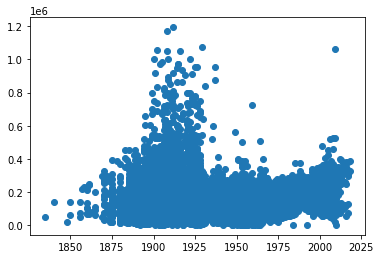

In [10]:
plt.scatter(housingdata['Year_Built'], housingdata['Sale_price'])

In [11]:
housingdata = housingdata.drop(columns = 'Extwall')

In [12]:
housingdata.corr()

,District,Nbhd,Stories,Year_Built,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_price
District,1.000000,0.713577,-0.033095,-0.038404,-0.090708,0.000391,-0.000529,-0.030078,-0.045731,-0.044911,0.025499
Nbhd,0.713577,1.000000,0.033948,-0.228249,-0.013537,0.046353,0.002969,0.026843,-0.086116,-0.193538,0.192575
Stories,-0.033095,0.033948,1.000000,-0.230718,0.690337,0.530340,0.038381,0.456427,0.139421,-0.079108,0.309309
Year_Built,-0.038404,-0.228249,-0.230718,1.000000,-0.227115,-0.263869,-0.029671,-0.152557,0.225566,0.437667,-0.011483
Fin_sqft,-0.090708,-0.013537,0.690337,-0.227115,1.000000,0.537705,0.059282,0.660182,0.178136,0.082356,0.535026
Units,0.000391,0.046353,0.530340,-0.263869,0.537705,1.000000,0.043428,0.513936,-0.130414,-0.145449,-0.025201
Bdrms,-0.000529,0.002969,0.038381,-0.029671,0.059282,0.043428,1.000000,0.048777,0.001549,-0.005924,0.012327
Fbath,-0.030078,0.026843,0.456427,-0.152557,0.660182,0.513936,0.048777,1.000000,-0.127314,0.028500,0.369559
Hbath,-0.045731,-0.086116,0.139421,0.225566,0.178136,-0.130414,0.001549,-0.127314,1.000000,0.216218,0.274860
Lotsize,-0.044911,-0.193538,-0.079108,0.437667,0.082356,-0.145449,-0.005924,0.028500,0.216218,1.000000,0.186773


In [13]:
# group by district
housingdata['District'].unique()

array([ 7,  3,  4, 12, 11,  1, 13,  8, 15,  6,  9,  2,  5, 10, 14],
      dtype=int64)

In [14]:
housingdata1 = housingdata[housingdata['District'] == 1.0]
housingdata2 = housingdata[housingdata['District'] == 2.0]
housingdata3 = housingdata[housingdata['District'] == 3.0]
housingdata4 = housingdata[housingdata['District'] == 4.0]
housingdata5 = housingdata[housingdata['District'] == 5.0]
housingdata6 = housingdata[housingdata['District'] == 6.0]
housingdata7 = housingdata[housingdata['District'] == 7.0]
housingdata8 = housingdata[housingdata['District'] == 8.0]
housingdata9 = housingdata[housingdata['District'] == 9.0]
housingdata10 = housingdata[housingdata['District'] == 10.0]
housingdata11 = housingdata[housingdata['District'] == 11.0]
housingdata12 = housingdata[housingdata['District'] == 12.0]
housingdata13 = housingdata[housingdata['District'] == 13.0]
housingdata14 = housingdata[housingdata['District'] == 14.0]
housingdata15 = housingdata[housingdata['District'] == 15.0]

In [15]:
# Check for NA's in target data and training data
housingdata['Sale_price'].isnull().values.sum()

0

In [16]:
housingdata['Year_Built'].isnull().values.sum()

0

#  Linear Regression Model Testing

Using Year Built

In [17]:
# split data into train and test data
# our target is the slae price and we will try many different features to find most accurate
y = housingdata.Sale_price.values
X = housingdata.Year_Built.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [18]:
lin_reg_year = LinearRegression().fit(X_train, y_train)

In [19]:
print('model coeff (w): {}'
     .format(lin_reg_year.coef_))
print('model intercept (b): {:.3f}'
     .format(lin_reg_year.intercept_))
print('R-squared score (training): {:.3f}'
     .format(lin_reg_year.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lin_reg_year.score(X_test, y_test)))

model coeff (w): [-31.050628]
model intercept (b): 198589.985
R-squared score (training): 0.000
R-squared score (test): 0.000


from results we can see that year built will not be a valuable part of determining sale price

Using District Number

In [20]:
housingdata['District'].isnull().values.sum()

0

In [21]:
X = housingdata.District.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [22]:
lin_reg_district = LinearRegression().fit(X_train, y_train)

In [23]:
print('model coeff (w): {}'
     .format(lin_reg_district.coef_))
print('model intercept (b): {:.3f}'
     .format(lin_reg_district.intercept_))
print('R-squared score (training): {:.3f}'
     .format(lin_reg_district.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lin_reg_district.score(X_test, y_test)))

model coeff (w): [539.92222017]
model intercept (b): 133647.074
R-squared score (training): 0.001
R-squared score (test): 0.000


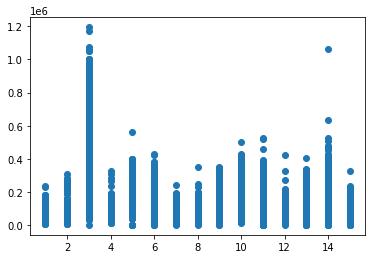

In [24]:
plt.scatter(housingdata['District'], housingdata['Sale_price'])

Using Neighborhood

In [25]:
housingdata['Nbhd'].isnull().values.sum()

0

In [26]:
X = housingdata.Nbhd.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [27]:
lin_reg_district = LinearRegression().fit(X_train, y_train)

In [28]:
print('model coeff (w): {}'
     .format(lin_reg_district.coef_))
print('model intercept (b): {:.3f}'
     .format(lin_reg_district.intercept_))
print('R-squared score (training): {:.3f}'
     .format(lin_reg_district.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lin_reg_district.score(X_test, y_test)))

model coeff (w): [10.89662145]
model intercept (b): 105468.065
R-squared score (training): 0.036
R-squared score (test): 0.039


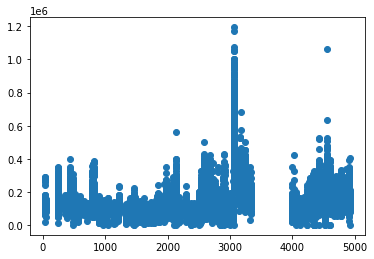

In [29]:
plt.scatter(housingdata['Nbhd'], housingdata['Sale_price'])

Basically no correlation, unusable as is

Using Finished Sqft

In [30]:
housingdata['Fin_sqft'].isnull().values.sum()

0

In [31]:
X = housingdata.Fin_sqft.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [32]:
lin_reg_sqft = LinearRegression().fit(X_train, y_train)

In [33]:
print('model coeff (w): {}'
     .format(lin_reg_sqft.coef_))
print('model intercept (b): {:.3f}'
     .format(lin_reg_sqft.intercept_))
print('R-squared score (training): {:.3f}'
     .format(lin_reg_sqft.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lin_reg_sqft.score(X_test, y_test)))

model coeff (w): [70.43281467]
model intercept (b): 32733.518
R-squared score (training): 0.287
R-squared score (test): 0.283


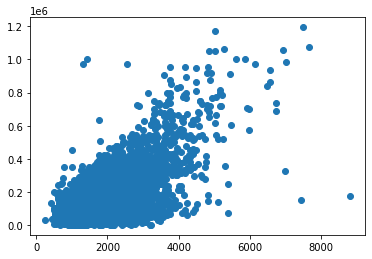

In [34]:
plt.scatter(housingdata['Fin_sqft'], housingdata['Sale_price'])

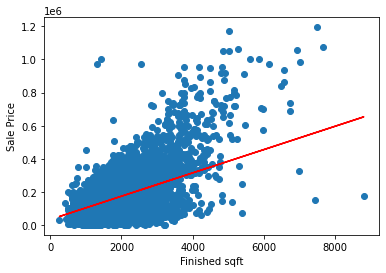

In [35]:
plt.scatter(X,y)
plt.plot(X,lin_reg_sqft.coef_*X+lin_reg_sqft.intercept_,'-r')
plt.xlabel('Finished sqft')
plt.ylabel('Sale Price')
plt.show()

Best R-score so far

In [36]:
# At this point it is clear that a single variable will not be able to accurately predict price 
# in a standard Linear Regression, since Finished sqft has highest correlation to sale_price
# Try using a multiple variable linear regression

Finished Sqft, FBath, and Stories

In [37]:
housingdata['Fbath'].isnull().values.sum()

0

In [38]:
housingdata['Stories'].isnull().values.sum()

0

In [39]:
housingdata['Fin_sqft'].isnull().values.sum()

0

In [40]:
housingdata = housingdata[housingdata['Fbath'].isnull() == False] 

In [41]:
X = housingdata[['Fin_sqft', 'Fbath', 'Stories']]
y = housingdata['Sale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)
lin_reg_mult1 = LinearRegression().fit(X_train, y_train)

print('model coeffs (w): {}'
     .format(lin_reg_mult1.coef_))
print('model intercept (b): {:.3f}'
     .format(lin_reg_mult1.intercept_))
print('R-squared score (training): {:.3f}'
     .format(lin_reg_mult1.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lin_reg_mult1.score(X_test, y_test)))

model coeffs (w): [    77.92931064   4944.99254486 -22658.26685517]
model intercept (b): 43631.941
R-squared score (training): 0.295
R-squared score (test): 0.289


# Finished Sqft and Nbhd

In [42]:
housingdata['Fin_sqft'].isnull().values.sum()

0

In [43]:
housingdata['Nbhd'].isnull().values.sum()

0

In [44]:
X = housingdata[['Fin_sqft', 'Nbhd']]
y = housingdata['Sale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)
lin_reg_mult1 = LinearRegression().fit(X_train, y_train)

print('model coeffs (w): {}'
     .format(lin_reg_mult1.coef_))
print('model intercept (b): {:.3f}'
     .format(lin_reg_mult1.intercept_))
print('R-squared score (training): {:.3f}'
     .format(lin_reg_mult1.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lin_reg_mult1.score(X_test, y_test)))

model coeffs (w): [70.80503996 11.3373151 ]
model intercept (b): -2007.408
R-squared score (training): 0.327
R-squared score (test): 0.325


# Finished Sqft and District

In [45]:
housingdata['Fin_sqft'].isnull().values.sum()

0

In [46]:
housingdata['District'].isnull().values.sum()

0

In [47]:
X = housingdata[['Fin_sqft', 'District']]
y = housingdata['Sale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)
lin_reg_mult1 = LinearRegression().fit(X_train, y_train)

print('model coeffs (w): {}'
     .format(lin_reg_mult1.coef_))
print('model intercept (b): {:.3f}'
     .format(lin_reg_mult1.intercept_))
print('R-squared score (training): {:.3f}'
     .format(lin_reg_mult1.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lin_reg_mult1.score(X_test, y_test)))

model coeffs (w): [  71.34639026 1506.24906763]
model intercept (b): 18321.368
R-squared score (training): 0.293
R-squared score (test): 0.287


#  Using district specific values

In [48]:
mean_prices = {1:statistics.mean(housingdata1['Sale_price']),
               2:statistics.mean(housingdata2['Sale_price']),
               3:statistics.mean(housingdata3['Sale_price']),
               4:statistics.mean(housingdata4['Sale_price']),
               5:statistics.mean(housingdata5['Sale_price']),
               6:statistics.mean(housingdata6['Sale_price']),
               7:statistics.mean(housingdata7['Sale_price']),
               8:statistics.mean(housingdata8['Sale_price']),
               9:statistics.mean(housingdata9['Sale_price']),
               10:statistics.mean(housingdata10['Sale_price']),
               11:statistics.mean(housingdata11['Sale_price']),
               12:statistics.mean(housingdata12['Sale_price']),
               13:statistics.mean(housingdata13['Sale_price']),
               14:statistics.mean(housingdata14['Sale_price']),
               15:statistics.mean(housingdata15['Sale_price'])}
print(mean_prices)

{1: 70130.00792864223, 2: 88591.07304964539, 3: 288807.5890585242, 4: 85313.71686746988, 5: 136445.66808397556, 6: 91010.46230440967, 7: 75124.65537270087, 8: 87057.63408820024, 9: 125612.47643979058, 10: 140750.33248175183, 11: 146135.2878622198, 12: 71310.38004246284, 13: 146453.59694989107, 14: 168330.23035904727, 15: 64969.05037313433}


In [49]:
# District 1 70k 2 88k 3 288 4 85 5 136 6 91 7 75 8 87 9 125 10 140 11 146 12 71 13 146 14 168 15 65

# District 3

In [50]:
housingdata3.corr()

,District,Nbhd,Stories,Year_Built,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_price
District,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nbhd,NaN,1.000000,0.094349,0.072236,-0.035158,0.093358,0.001577,-0.065772,-0.079537,-0.031045,-0.069962
Stories,NaN,0.094349,1.000000,0.014468,0.569136,0.222870,0.489476,0.360868,0.293503,0.258461,0.414969
Year_Built,NaN,0.072236,0.014468,1.000000,0.093527,-0.059508,0.037280,0.053551,0.101504,0.318528,0.130394
Fin_sqft,NaN,-0.035158,0.569136,0.093527,1.000000,0.147611,0.686073,0.723962,0.381780,0.631602,0.791851
Units,NaN,0.093358,0.222870,-0.059508,0.147611,1.000000,0.362639,0.294566,-0.374105,-0.155505,-0.195387
Bdrms,NaN,0.001577,0.489476,0.037280,0.686073,0.362639,1.000000,0.550966,0.095645,0.316194,0.385757
Fbath,NaN,-0.065772,0.360868,0.053551,0.723962,0.294566,0.550966,1.000000,0.111203,0.440115,0.575211
Hbath,NaN,-0.079537,0.293503,0.101504,0.381780,-0.374105,0.095645,0.111203,1.000000,0.419143,0.533806
Lotsize,NaN,-0.031045,0.258461,0.318528,0.631602,-0.155505,0.316194,0.440115,0.419143,1.000000,0.660855


Using Finished Sqft for District 3

In [51]:
housingdata3['Fin_sqft'].isnull().values.sum()

0

In [52]:
X = housingdata3.Fin_sqft.values.reshape(-1,1)
y = housingdata3.Sale_price.values
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [53]:
lin_reg_sqft3 = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg_sqft3.predict(X_test)

In [54]:
print('model coeff (w):): {}'
     .format(lin_reg_sqft3.coef_))
print('model intercept (b): {:.3f}'
     .format(lin_reg_sqft3.intercept_))
print('R-squared score (training): {:.3f}'
     .format(lin_reg_sqft3.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lin_reg_sqft3.score(X_test, y_test)))

model coeff (w):): [136.1655246]
model intercept (b): -25687.092
R-squared score (training): 0.644
R-squared score (test): 0.569


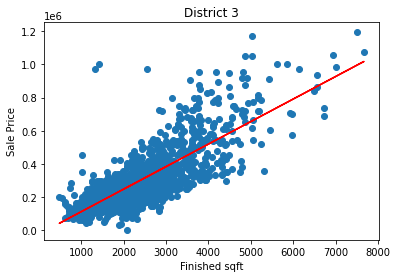

In [55]:
plt.scatter(X,y)
plt.plot(X,lin_reg_sqft3.coef_*X+lin_reg_sqft3.intercept_,'-r')
plt.xlabel('Finished sqft')
plt.ylabel('Sale Price')
plt.title('District 3')
plt.show()

# District 14

In [56]:
housingdata14.corr()

,District,Nbhd,Stories,Year_Built,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_price
District,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nbhd,NaN,1.000000,0.014712,-0.037019,-0.043307,-0.112362,-0.083747,-0.012848,0.029224,0.033039,0.224544
Stories,NaN,0.014712,1.000000,-0.129880,0.602297,0.459181,0.392174,0.356788,0.125927,-0.017807,0.344456
Year_Built,NaN,-0.037019,-0.129880,1.000000,-0.221466,-0.169127,-0.167582,-0.187496,0.060485,0.276600,-0.059328
Fin_sqft,NaN,-0.043307,0.602297,-0.221466,1.000000,0.642476,0.725187,0.608880,0.069578,0.095556,0.456862
Units,NaN,-0.112362,0.459181,-0.169127,0.642476,1.000000,0.565654,0.570628,-0.176353,-0.006021,0.023361
Bdrms,NaN,-0.083747,0.392174,-0.167582,0.725187,0.565654,1.000000,0.476714,0.003065,0.052318,0.192474
Fbath,NaN,-0.012848,0.356788,-0.187496,0.608880,0.570628,0.476714,1.000000,-0.217472,0.038577,0.325144
Hbath,NaN,0.029224,0.125927,0.060485,0.069578,-0.176353,0.003065,-0.217472,1.000000,0.071502,0.189483
Lotsize,NaN,0.033039,-0.017807,0.276600,0.095556,-0.006021,0.052318,0.038577,0.071502,1.000000,0.114556


Using Finished Sqft for District 14

In [57]:
housingdata14['Fin_sqft'].isnull().values.sum()

0

In [58]:
X = housingdata14.Fin_sqft.values.reshape(-1,1)
y = housingdata14.Sale_price.values
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [59]:
lin_reg_sqft14 = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg_sqft14.predict(X_test)

In [60]:
print('model coeff (w): {}'
     .format(lin_reg_sqft14.coef_))
print('model intercept (b): {:.3f}'
     .format(lin_reg_sqft14.intercept_))
print('R-squared score (training): {:.3f}'
     .format(lin_reg_sqft14.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lin_reg_sqft14.score(X_test, y_test)))

model coeff (w): [62.65655341]
model intercept (b): 75679.785
R-squared score (training): 0.223
R-squared score (test): 0.164


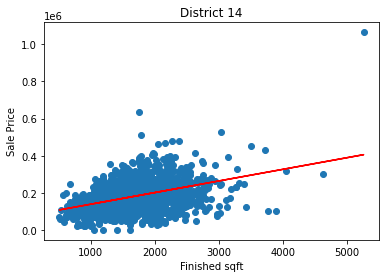

In [61]:
plt.scatter(X,y)
plt.plot(X,lin_reg_sqft14.coef_*X+lin_reg_sqft14.intercept_,'-r')
plt.xlabel('Finished sqft')
plt.ylabel('Sale Price')
plt.title('District 14')
plt.show()

y = 75679.785 + 62.66x

In [62]:
housingdata15.corr()

,District,Nbhd,Stories,Year_Built,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_price
District,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nbhd,NaN,1.000000,-0.065831,0.195214,-0.237159,-0.159577,-0.187402,-0.025002,0.132277,0.071526,-0.079104
Stories,NaN,-0.065831,1.000000,0.085103,0.591975,0.554077,0.447865,0.407650,0.011806,0.029649,0.026594
Year_Built,NaN,0.195214,0.085103,1.000000,-0.157192,-0.354811,-0.268995,-0.027078,0.361670,0.252374,0.401872
Fin_sqft,NaN,-0.237159,0.591975,-0.157192,1.000000,0.606618,0.718126,0.653608,-0.096652,0.242373,0.266307
Units,NaN,-0.159577,0.554077,-0.354811,0.606618,1.000000,0.596610,0.563252,-0.390365,-0.120509,-0.259900
Bdrms,NaN,-0.187402,0.447865,-0.268995,0.718126,0.596610,1.000000,0.439114,-0.179628,0.063498,-0.022074
Fbath,NaN,-0.025002,0.407650,-0.027078,0.653608,0.563252,0.439114,1.000000,-0.285636,0.123100,0.129964
Hbath,NaN,0.132277,0.011806,0.361670,-0.096652,-0.390365,-0.179628,-0.285636,1.000000,0.244570,0.350793
Lotsize,NaN,0.071526,0.029649,0.252374,0.242373,-0.120509,0.063498,0.123100,0.244570,1.000000,0.462441


Using Finished Sqft for District 15

In [63]:
housingdata15['Fin_sqft'].isnull().values.sum()

0

In [64]:
X = housingdata15.Fin_sqft.values.reshape(-1,1)
y = housingdata15.Sale_price.values
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [65]:
lin_reg_sqft15 = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg_sqft15.predict(X_test)

In [66]:
print('model coeff (b1): {}'
     .format(lin_reg_sqft15.coef_))
print('model intercept (b0): {:.3f}'
     .format(lin_reg_sqft15.intercept_))
print('R-squared score (training): {:.3f}'
     .format(lin_reg_sqft15.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lin_reg_sqft15.score(X_test, y_test)))

model coeff (b1): [20.13007464]
model intercept (b0): 26506.438
R-squared score (training): 0.064
R-squared score (test): 0.079


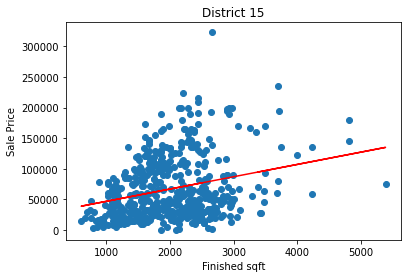

In [67]:
plt.scatter(X,y)
plt.plot(X,lin_reg_sqft15.coef_*X+lin_reg_sqft15.intercept_,'-r')
plt.xlabel('Finished sqft')
plt.ylabel('Sale Price')
plt.title('District 15')
plt.show()

y = 26506.438 + 20.13007464x

D 15 using year built

In [68]:
housingdata15['Year_Built'].isnull().values.sum()

0

In [69]:
X = housingdata15.Year_Built.values.reshape(-1,1)
y = housingdata15.Sale_price.values
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [70]:
lin_reg_yb15 = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg_yb15.predict(X_test)

In [71]:
print('model coeff (w): {}'
     .format(lin_reg_yb15.coef_))
print('model intercept (b): {:.3f}'
     .format(lin_reg_yb15.intercept_))
print('R-squared score (training): {:.3f}'
     .format(lin_reg_yb15.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lin_reg_yb15.score(X_test, y_test)))

model coeff (w): [578.01734662]
model intercept (b): -1046543.919
R-squared score (training): 0.160
R-squared score (test): 0.157


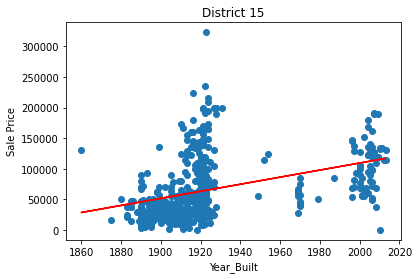

In [72]:
plt.scatter(X,y)
plt.plot(X,lin_reg_yb15.coef_*X+lin_reg_yb15.intercept_,'-r')
plt.xlabel('Year_Built')
plt.ylabel('Sale Price')
plt.title('District 15')
plt.show()

y = -1046543.919 + 578.01734662x

We can see from our models that homes in district 15 have less value based on location alone than district 3.
After research into crime statistics in MKE it is clear that D 15 is a far more dangerous place to live than D 3. Which throws our regression off since homes that are larger are not always sold for a higher price since the area is more dangerous. Year built has the highest correlation to sale price so we can try and use that to get a better score on our regression.

# District 1

In [91]:
housingdata1['Fin_sqft'].isnull().values.sum()

0

Using Finished Sqft for District 1

In [92]:
X = housingdata1.Fin_sqft.values.reshape(-1,1)
y = housingdata1.Sale_price.values
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [93]:
lin_reg_sqft1 = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg_sqft1.predict(X_test)

In [94]:
print('model coeff (w): {}'
     .format(lin_reg_sqft1.coef_))
print('model intercept (b): {:.3f}'
     .format(lin_reg_sqft1.intercept_))
print('R-squared score (training): {:.3f}'
     .format(lin_reg_sqft1.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lin_reg_sqft1.score(X_test, y_test)))

model coeff (w): [27.06828811]
model intercept (b): 34953.710
R-squared score (training): 0.118
R-squared score (test): 0.158


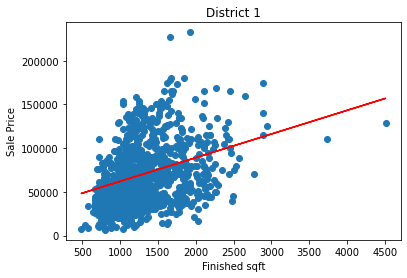

In [95]:
plt.scatter(X,y)
plt.plot(X,lin_reg_sqft1.coef_*X+lin_reg_sqft1.intercept_,'-r')
plt.xlabel('Finished sqft')
plt.ylabel('Sale Price')
plt.title('District 1')
plt.show()

y = 34953.710 + 27.06828811x

D 1 using year built

In [96]:
housingdata1['Year_Built'].isnull().values.sum()

0

In [97]:
X = housingdata1.Year_Built.values.reshape(-1,1)
y = housingdata1.Sale_price.values
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [98]:
lin_reg_yb1 = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg_yb1.predict(X_test)

In [99]:
print('model coeff (w): {}'
     .format(lin_reg_yb1.coef_))
print('model intercept (b): {:.3f}'
     .format(lin_reg_yb1.intercept_))
print('R-squared score (training): {:.3f}'
     .format(lin_reg_yb1.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lin_reg_yb1.score(X_test, y_test)))

model coeff (w): [606.96954445]
model intercept (b): -1109623.636
R-squared score (training): 0.071
R-squared score (test): 0.103


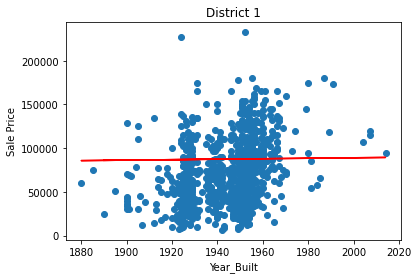

In [100]:
plt.scatter(X,y)
plt.plot(X,lin_reg_sqft1.coef_*X+lin_reg_sqft1.intercept_,'-r')
plt.xlabel('Year_Built')
plt.ylabel('Sale Price')
plt.title('District 1')
plt.show()

y = -1109623.636 + 606.97x